In [1]:
import pandas as pd
import numpy as np
import between_softwares_and_versions as bt
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [2]:
merged_df_cost = pd.read_csv("cost_df.csv")
merged_df_softwares = pd.read_csv("software_df.csv")

In [3]:
merged_df_softwares

,Unnamed: 0,Participant_ID,FD_std_flirt_MNI152NLin2009cAsym_res-01,MAD_flirt_MNI152NLin2009cAsym_res-01,QC_status_flirt_MNI152NLin2009cAsym_res-01,cohort,FD_std_flirt_MNI152NLin2009cSym_res-1,MAD_flirt_MNI152NLin2009cSym_res-1,QC_status_flirt_MNI152NLin2009cSym_res-1,FD_std_ants_MNI152NLin2009cAsym_res-01,...,QC_status_ants_MNI152NLin2009cAsym_res-01,FD_std_ants_MNI152NLin2009cSym_res-1,MAD_ants_MNI152NLin2009cSym_res-1,QC_status_ants_MNI152NLin2009cSym_res-1,FD_std_spm_MNI152NLin2009cAsym_res-01,MAD_spm_MNI152NLin2009cAsym_res-01,QC_status_spm_MNI152NLin2009cAsym_res-01,FD_std_spm_MNI152NLin2009cSym_res-1,MAD_spm_MNI152NLin2009cSym_res-1,QC_status_spm_MNI152NLin2009cSym_res-1
0,0,sub-40882,0.061225,0.057676,fine,PD,0.045260,0.088220,fine,0.063080,...,fine,0.035638,0.030348,fine,3.438953e-09,3.975848e-09,fine,7.326182e-10,1.045732e-09,fine
1,1,sub-179784,0.052101,0.063449,fine,PD,0.040264,0.068416,fine,0.064367,...,fine,0.046473,0.054113,fine,3.310995e-09,3.238402e-09,fine,4.442506e-10,7.754316e-10,fine
2,2,sub-75562,0.026760,0.027624,fine,PD,0.077094,0.052947,fine,0.084388,...,fine,0.069703,0.057070,fine,1.199210e-07,2.373137e-07,failed,1.046132e-07,1.973355e-07,failed
3,3,sub-3001,0.013878,0.044102,fine,PD,0.057656,0.047958,fine,0.052423,...,fine,0.030851,0.027878,fine,1.622609e-09,1.489641e-09,fine,1.086511e-08,1.187039e-08,fine
4,4,sub-3078,0.048364,0.045767,fine,PD,0.070347,0.124294,fine,0.057285,...,fine,0.069718,0.077032,fine,2.970846e-10,2.760029e-10,fine,1.354249e-11,2.057767e-11,fine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,sub-3709,0.153446,0.310676,failed,PD,0.086236,0.060697,failed,0.077334,...,fine,0.075017,0.052931,fine,3.129649e-08,2.720814e-08,failed,2.033258e-07,4.053071e-07,failed
96,96,sub-3700,0.134799,0.175767,failed,PD,0.229696,0.222623,failed,0.045682,...,fine,0.038629,0.035896,fine,6.821168e-09,6.342439e-09,failed,4.095503e-09,3.103715e-09,failed
97,97,sub-3403,0.928398,2.783429,failed,PD,1.093538,1.774050,failed,0.134310,...,fine,0.127160,0.114427,fine,2.321401e-07,2.168597e-07,failed,1.139734e-07,7.568195e-07,failed
98,98,sub-116230,0.155635,0.205450,failed,HC,0.077252,0.121580,failed,11.364920,...,failed,12.978348,13.166702,failed,2.912035e-07,3.619504e-07,failed,1.549024e-07,1.397682e-07,failed


In [4]:


parent_path = Path("/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams")
softwares = ["spm", "flirt", "ants"]
templates = ["MNI152NLin2009cAsym_res-01", "MNI152NLin2009cSym_res-1"]

def func_fd_passed(s, t):
        return "FD_fine_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)

/tmp/ipykernel_3385330/660972182.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = all_data.groupby('software - template')['value'].median()
/tmp/ipykernel_3385330/660972182.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='software - template', y='value', data=all_data, size=3, palette=color_palette)
/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/niusham/projects/rrg-jbpoline/niusham/mca_li

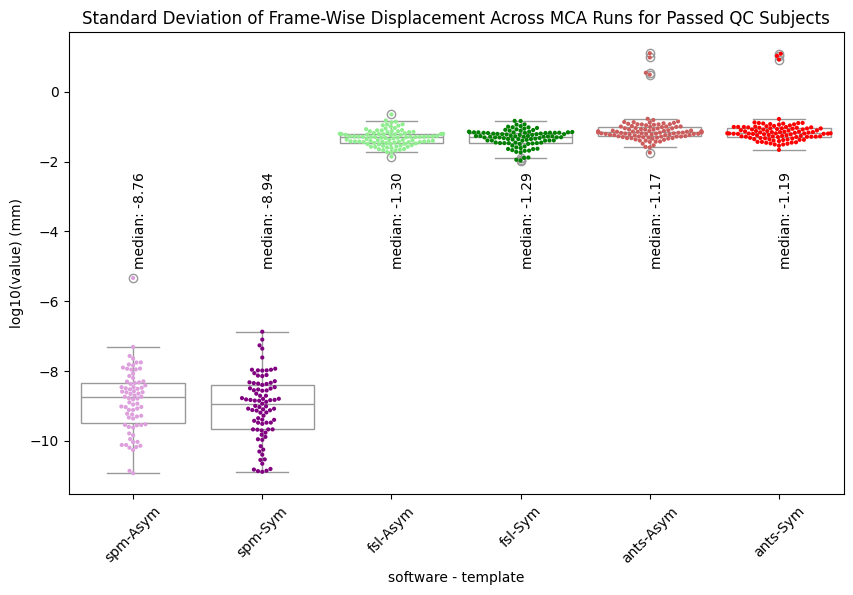

In [5]:
dfs = []
new_labels = ["spm-Asym", "spm-Sym", "fsl-Asym", "fsl-Sym", "ants-Asym", "ants-Sym"]
labels = []
for software, templates in data.items():
    for template, array in templates.items():
        df = pd.DataFrame({
            'software - template': f"{software} - {template}",
            'value': np.log10(np.std(array, axis=1))
        })
        labels.append(f"{software} - {template}")
        dfs.append(df)

all_data = pd.concat(dfs)
all_data['software - template'] = pd.Categorical(all_data['software - template'], categories=labels, ordered=True)
pairs = all_data["software - template"].unique()
color_palette = {
    pairs[0]: '#dda0dd',  # Light blue
    pairs[1]: '#800080',  # Dark blue
   pairs[2]: '#90ee90',  # Light green
    pairs[3]: '#008000',  # Dark green
    pairs[4]: '#cd5c5c',  # Light red
    pairs[5]: '#ff0000'   # Dark red
}
medians = all_data.groupby('software - template')['value'].median()
plt.figure(figsize=(10, 6))
sns.swarmplot(x='software - template', y='value', data=all_data, size=3, palette=color_palette)
sns.boxplot(x='software - template', y='value', data=all_data, color="white")
for i, median in enumerate(medians.keys()):
     plt.text(i, -5, f"median: {medians[median]:.2f}", fontsize=10, rotation=90)
#medians[median] - 1
plt.title('Standard Deviation of Frame-Wise Displacement Across MCA Runs for Passed QC Subjects')
plt.ylabel('log10(value) (mm)')
plt.xticks(ticks=list(range(6)), rotation=45, labels=new_labels)
plt.show()


/tmp/ipykernel_3385330/1903557229.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = all_data.groupby('software - template')['value'].median()
/tmp/ipykernel_3385330/1903557229.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='software - template', y='value', data=all_data, palette=color_palette, size=4)
/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


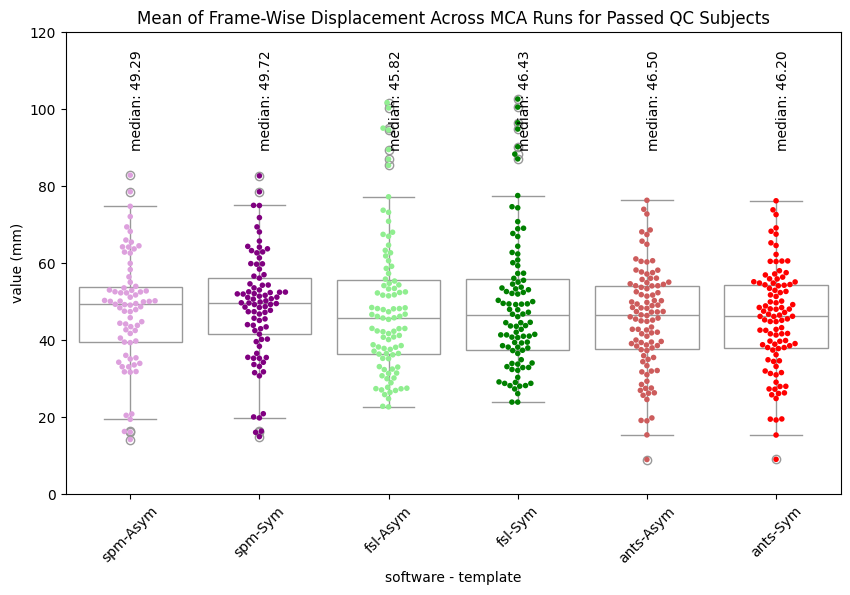

In [6]:
def func_fd_passed(s, t):
        return "FD_fine_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)


dfs = []
numps = []
new_labels = ["spm-Asym", "spm-Sym", "fsl-Asym", "fsl-Sym", "ants-Asym", "ants-Sym"]
for software, templates in data.items():
    for template, array in templates.items():
        df = pd.DataFrame({
            'software - template': f"{software} - {template}",
            'value': np.mean(array, axis=1)
        })
        dfs.append(df)
        numps.append(np.std(array, axis=1))

all_data = pd.concat(dfs)
all_data['software - template'] = pd.Categorical(all_data['software - template'], categories=labels, ordered=True)
medians = all_data.groupby('software - template')['value'].median()
plt.figure(figsize=(10, 6))
sns.swarmplot(x='software - template', y='value', data=all_data, palette=color_palette, size=4)
sns.boxplot(x='software - template', y='value', data=all_data, color="white")
for i, median in enumerate(medians.keys()):
     plt.text(i, 90, f"median: {medians[median]:.2f}", fontsize=10, rotation=90)
# medians[median] -10
plt.title('Mean of Frame-Wise Displacement Across MCA Runs for Passed QC Subjects')
plt.ylabel('value (mm)')
plt.xticks(ticks=list(range(6)), rotation=45, labels=new_labels)
plt.ylim((0,120))
plt.show()

In [7]:
medians

software - template
spm - MNI152NLin2009cAsym_res-01      49.285051
spm - MNI152NLin2009cSym_res-1        49.718296
flirt - MNI152NLin2009cAsym_res-01    45.820568
flirt - MNI152NLin2009cSym_res-1      46.428649
ants - MNI152NLin2009cAsym_res-01     46.497577
ants - MNI152NLin2009cSym_res-1       46.197119
Name: value, dtype: float64

/tmp/ipykernel_3385330/3719937917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(np.log10(merged_df_softwares[merged_df_softwares["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "fine"]["FD_std_spm_MNI152NLin2009cAsym_res-01"]), palette=['#90ee90'])
/tmp/ipykernel_3385330/3719937917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(np.log10(merged_df_softwares[merged_df_softwares["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "failed"]["FD_std_spm_MNI152NLin2009cAsym_res-01"]), palette=['#ee9090'])


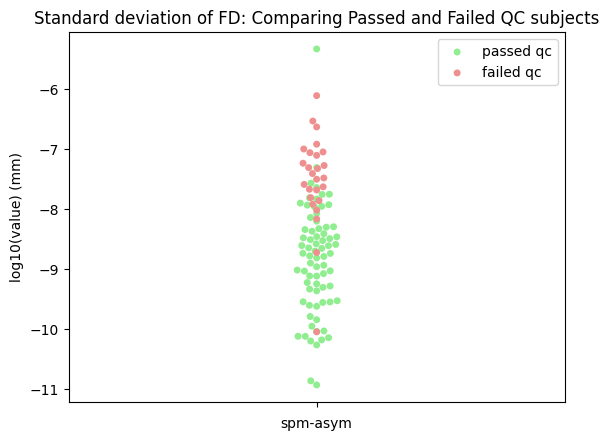

In [8]:
plt.figure()
sns.swarmplot(np.log10(merged_df_softwares[merged_df_softwares["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "fine"]["FD_std_spm_MNI152NLin2009cAsym_res-01"]), palette=['#90ee90'])
sns.swarmplot(np.log10(merged_df_softwares[merged_df_softwares["QC_status_spm_MNI152NLin2009cAsym_res-01"] == "failed"]["FD_std_spm_MNI152NLin2009cAsym_res-01"]), palette=['#ee9090'])
plt.title("Standard deviation of FD: Comparing Passed and Failed QC subjects")
plt.ylabel("log10(value) (mm)")
plt.xlabel("spm-asym")
plt.legend(["passed qc", "failed qc"])

In [9]:
verou_df = pd.read_csv("/home/niusham/projects/rrg-glatard/niusham/mca_linear_registration/verrou_plots/spm/MNI152NLin2009cAsym_res-01/reports/FD_MAD.csv")

In [10]:
from lnrgst_mca.plot_utils import plotter

/lustre06/project/6061841/niusham/mca_linear_registration/lnrgst_mca/plot_utils.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=axis_labels[i], y="Value", data=df, palette=palette, size=4)


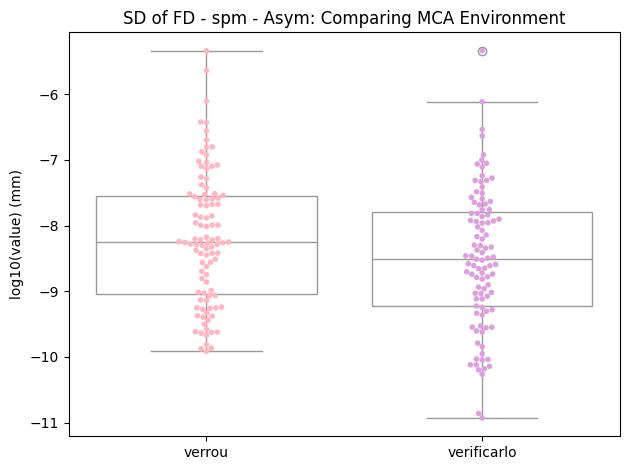

In [18]:
plotter(np.log10(verou_df["FD_std_spm_MNI152NLin2009cAsym_res-01"].values), np.log10(merged_df_softwares["FD_std_spm_MNI152NLin2009cAsym_res-01"].values), "SD of FD - spm - Asym: Comparing MCA Environment", palette=['#FFB6C1', '#dda0dd'], ylable="log10(value) (mm)", labels=['verrou', 'verificarlo'], axis_labels=[''])

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

costfunctions = ["mutualinfo", "normmi", "normcorr", "corratio"]
dfs = []

for c in costfunctions:
    filter_col = f"QC_status_flirt_MNI152NLin2009cAsym_res-01_{c}"
    value_col = f"FD_std_flirt_MNI152NLin2009cAsym_res-01_{c}"
    
    # Ensure you are selecting the correct columns and the DataFrame contains the necessary columns
    df = merged_df_cost[merged_df_cost[filter_col] == "fine"].copy()
    df = np.log10(df[[value_col]]).reset_index(drop=True)
    df.rename(columns={value_col: 'FD_std'}, inplace=True)
    df['Cost Function'] = c  # Add a new column for the cost function
    dfs.append(df)

# Concatenate all dataframes into one
full_df = pd.concat(dfs, ignore_index=True)

# Verify DataFrame columns
print(full_df.head())


     FD_std Cost Function
0 -0.695133    mutualinfo
1 -0.481468    mutualinfo
2 -0.285460    mutualinfo
3 -0.658643    mutualinfo
4 -0.467371    mutualinfo


/tmp/ipykernel_3385330/2500908915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Cost Function', y='FD_std', data=full_df, palette=["#9ACD32", "#90ee0d", "#90eeb3", "#90ee90"])


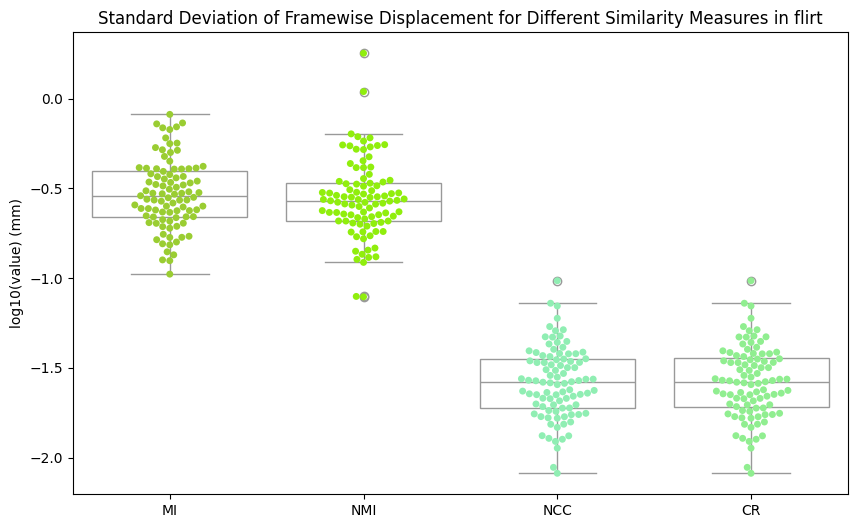

In [14]:
# Set the aesthetic style of the plots
# sns.set(style="whitegrid")

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.swarmplot(x='Cost Function', y='FD_std', data=full_df, palette=["#9ACD32", "#90ee0d", "#90eeb3", "#90ee90"])
sns.boxplot(x='Cost Function', y='FD_std', data=full_df, color="white")
# Adding titles and labels
plt.title('Standard Deviation of Framewise Displacement for Different Similarity Measures in flirt')
plt.xlabel('')
plt.ylabel('log10(value) (mm)')
plt.xticks(range(4), labels=["MI","NMI", "NCC","CR"])

# Display the plot
plt.show()


/lustre06/project/6061841/niusham/mca_linear_registration/lnrgst_mca/plot_utils.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=axis_labels[i], y="Value", data=df, palette=palette, size=4)


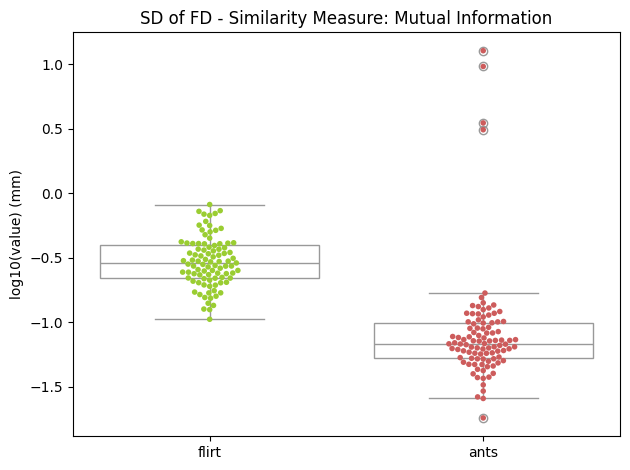

In [20]:
plotter(np.log10(merged_df_cost[merged_df_cost["QC_status_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"]=="fine"]["FD_std_flirt_MNI152NLin2009cAsym_res-01_mutualinfo"].values), np.log10(merged_df_softwares[merged_df_softwares["QC_status_ants_MNI152NLin2009cAsym_res-01"]=="fine"]["FD_std_ants_MNI152NLin2009cAsym_res-01"].values), "SD of FD - Similarity Measure: Mutual Information", palette=['#9ACD32', '#cd5c5c'], ylable="log10(value) (mm)", labels=['flirt', 'ants'], axis_labels=[''])

In [ ]:
SD of FD - Similarity Measure: Mutual Information